# Generating Pokemon captioning

In [1]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) Y
Token is valid (permission: write).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in case you want to set the 'store' creden

## Setup


### Install the Python SDK

The Python SDK for the Gemini API, is contained in the [`google-generativeai`](https://pypi.org/project/google-generativeai/) package. Install the dependency using pip:


In [2]:
!pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.9/146.9 kB 2.5 MB/s eta 0:00:00


### Import packages

Import the necessary packages.

In [3]:
import pathlib
import textwrap

import google.generativeai as genai

# Used to securely store your API key
from google.colab import userdata

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

### Setup your API key

Before you can use the Gemini API, you must first obtain an API key. If you don't already have one, create a key with one click in Google AI Studio.

<a class="button button-primary" href="https://makersuite.google.com/app/apikey" target="_blank" rel="noopener noreferrer">Get an API key</a>


In Colab, add the key to the secrets manager under the "🔑" in the left panel. Give it the name `GOOGLE_API_KEY`.

Once you have the API key, pass it to the SDK. You can do this in two ways:

* Put the key in the `GOOGLE_API_KEY` environment variable (the SDK will automatically pick it up from there).
* Pass the key to `genai.configure(api_key=...)`


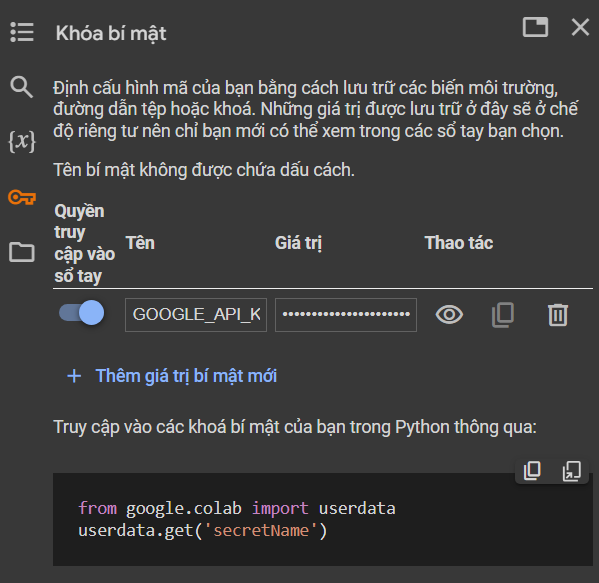

In [4]:
# Or use `os.getenv('GOOGLE_API_KEY')` to fetch an environment variable.
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

## Generate text from image and text inputs

Gemini provides a multimodal model (`gemini-pro-vision`) that accepts both text and images and inputs. The `GenerativeModel.generate_content` API is designed to handle multimodal prompts and returns a text output.

Let's include an image:

In [5]:
!curl -o image.jpg https://datasets-server.huggingface.co/assets/keremberke/pokemon-classification/--/full/train/8/image/image.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7831  100  7831    0     0  61017      0 --:--:-- --:--:-- --:--:-- 61179


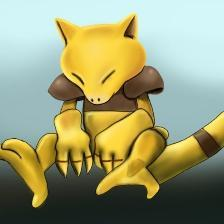

In [6]:
import PIL.Image

img = PIL.Image.open('image.jpg')
img

In [7]:
model = genai.GenerativeModel('gemini-pro-vision')

In [8]:
response = model.generate_content(["Give me a caption which describe the physical description from this pokemon. Do not show his/her name. Generating in plain text", img], stream=True)
response.resolve()

In [9]:
to_markdown(response.text)

>  It has a yellow body with brown stripes on its back and tail. It has three claws on each foot and a pair of pointed ears. Its eyes are always closed.

## Load dataset and add its description

In [10]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.8 MB/s eta 0:00:00


In [11]:
from datasets import load_dataset

ds = load_dataset("TeeA/Pokemon-Captioning-Classification")
example = ds['train'][0]

Generating train split:   0%|          | 0/4869 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1390 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/732 [00:00<?, ? examples/s]

In [12]:
example

{'image_file_path': '/storage/hf-datasets-cache/all/datasets/62466468774767-config-parquet-and-info-keremberke-pokemon-classi-0afca316/downloads/extracted/6fbe25684ad28ad64ea45905db1b4a8229214cde5e654d9572ff4c2124b85665/Abra/0282b2f3a22745f1a436054ea15a0ae5_jpg.rf.8672478a3b97f7c0c5b6737c3fd2d3d8.jpg',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>,
 'labels': 57,
 'caption': ' It has a yellow body with a tan belly and a tuft of fur on its head. It has three claws on each foot and a long tail with a tuft of fur on the end. Its eyes are red, and it has a small, triangular nose.'}

In [13]:
CLASSIFICATION_NAME = ['Porygon', 'Goldeen', 'Hitmonlee', 'Hitmonchan', 'Gloom', 'Aerodactyl', 'Mankey', 'Seadra', 'Gengar', 'Venonat', 'Articuno', 'Seaking', 'Dugtrio', 'Machop', 'Jynx', 'Oddish', 'Dodrio', 'Dragonair', 'Weedle', 'Golduck', 'Flareon', 'Krabby', 'Parasect', 'Ninetales', 'Nidoqueen', 'Kabutops', 'Drowzee', 'Caterpie', 'Jigglypuff', 'Machamp', 'Clefairy', 'Kangaskhan', 'Dragonite', 'Weepinbell', 'Fearow', 'Bellsprout', 'Grimer', 'Nidorina', 'Staryu', 'Horsea', 'Electabuzz', 'Dratini', 'Machoke', 'Magnemite', 'Squirtle', 'Gyarados', 'Pidgeot', 'Bulbasaur', 'Nidoking', 'Golem', 'Dewgong', 'Moltres', 'Zapdos', 'Poliwrath', 'Vulpix', 'Beedrill', 'Charmander', 'Abra', 'Zubat', 'Golbat', 'Wigglytuff', 'Charizard', 'Slowpoke', 'Poliwag', 'Tentacruel', 'Rhyhorn', 'Onix', 'Butterfree', 'Exeggcute', 'Sandslash', 'Pinsir', 'Rattata', 'Growlithe', 'Haunter', 'Pidgey', 'Ditto', 'Farfetchd', 'Pikachu', 'Raticate', 'Wartortle', 'Vaporeon', 'Cloyster', 'Hypno', 'Arbok', 'Metapod', 'Tangela', 'Kingler', 'Exeggutor', 'Kadabra', 'Seel', 'Voltorb', 'Chansey', 'Venomoth', 'Ponyta', 'Vileplume', 'Koffing', 'Blastoise', 'Tentacool', 'Lickitung', 'Paras', 'Clefable', 'Cubone', 'Marowak', 'Nidorino', 'Jolteon', 'Muk', 'Magikarp', 'Slowbro', 'Tauros', 'Kabuto', 'Spearow', 'Sandshrew', 'Eevee', 'Kakuna', 'Omastar', 'Ekans', 'Geodude', 'Magmar', 'Snorlax', 'Meowth', 'Pidgeotto', 'Venusaur', 'Persian', 'Rhydon', 'Starmie', 'Charmeleon', 'Lapras', 'Alakazam', 'Graveler', 'Psyduck', 'Rapidash', 'Doduo', 'Magneton', 'Arcanine', 'Electrode', 'Omanyte', 'Poliwhirl', 'Mew', 'Alolan Sandslash', 'Mewtwo', 'Weezing', 'Gastly', 'Victreebel', 'Ivysaur', 'MrMime', 'Shellder', 'Scyther', 'Diglett', 'Primeape', 'Raichu']

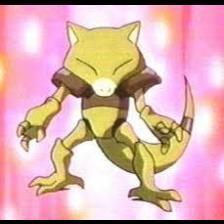

'Abra'

In [14]:
display(example['image'])
CLASSIFICATION_NAME[example['labels']]

In [15]:
# def init_caption(example):
#     example['caption'] = ''
#     return example

# # ds['train'] = ds['train'].map(init_caption)
# # ds['validation'] = ds['validation'].map(init_caption)
# # ds['test'] = ds['test'].map(init_caption)

Gia hạn num_img_per_period sau mỗi chu kỳ để các bộ train, validation, test

In [16]:
num_img_per_period = 200

In [17]:
def add_caption(example, handcraft:bool=False):
    try:
        global num_img_per_period

        if "caption" in example and example['caption'] != '' or num_img_per_period == 0:
            return example

        example['caption'] = ""

        try:
            response = model.generate_content(["Give me a caption which describe the physical description from this pokemon. Do not show his/her name. Generating in plain text in English", example['image']], stream=True)
        except:
            response = model.generate_content(["Give me a caption which describe the physical description from this pokemon. Do not show his/her name. Generating in plain text in English", example['image']], stream=False)

        try:
            response.resolve()
            example['caption'] = response.text
        except:
            print("Can not resolve an image")
            display(example['image'])
            if handcraft:
                example['caption'] = str(input())
    except:
        pass

    num_img_per_period -= 1

    return example

In [18]:
add_caption(ds['train'][0])

{'image_file_path': '/storage/hf-datasets-cache/all/datasets/62466468774767-config-parquet-and-info-keremberke-pokemon-classi-0afca316/downloads/extracted/6fbe25684ad28ad64ea45905db1b4a8229214cde5e654d9572ff4c2124b85665/Abra/0282b2f3a22745f1a436054ea15a0ae5_jpg.rf.8672478a3b97f7c0c5b6737c3fd2d3d8.jpg',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>,
 'labels': 57,
 'caption': ' It has a yellow body with a tan belly and a tuft of fur on its head. It has three claws on each foot and a long tail with a tuft of fur on the end. Its eyes are red, and it has a small, triangular nose.'}

Gia hạn num_img_per_period sau mỗi chu kỳ để các bộ train, validation, test

Parameter 'function'=<function add_caption at 0x7d6801edf6d0> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


Map:   0%|          | 0/4869 [00:00<?, ? examples/s]

Can not resolve an image


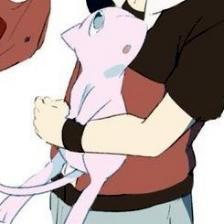

Can not resolve an image


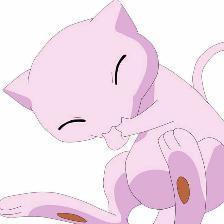

Can not resolve an image


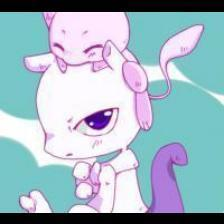

Can not resolve an image


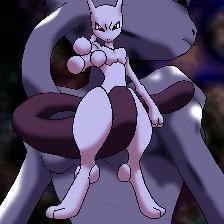

Can not resolve an image


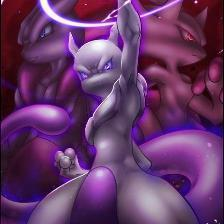

Can not resolve an image


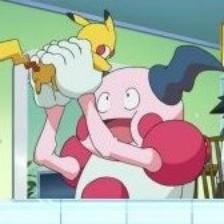

Can not resolve an image


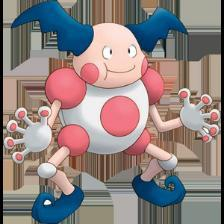

Can not resolve an image


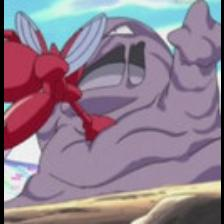

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/4869 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/49 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1390 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/14 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/732 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/8 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/4.34k [00:00<?, ?B/s]

Map:   0%|          | 0/4869 [00:00<?, ? examples/s]

Can not resolve an image


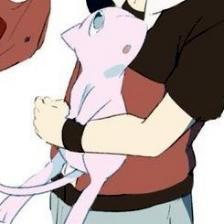

In [ ]:
for i in range(0, 49):
    num_img_per_period = 100
    ds['train'] = ds['train'].map(add_caption)
    ds.push_to_hub("TeeA/Pokemon-Captioning-Classification")

In [ ]:
for i in range(0, 14):
    num_img_per_period = 100
    ds['validation'] = ds['validation'].map(add_caption)
    ds.push_to_hub("TeeA/Pokemon-Captioning-Classification")

In [ ]:
for i in range(0, 8):
    num_img_per_period = 100
    ds['test'] = ds['test'].map(add_caption)
    ds.push_to_hub("TeeA/Pokemon-Captioning-Classification")

Because of can not mapping in a long continuous period of time, I will seperate in some period

Parameter 'function'=<function add_caption at 0x79e00baefc70> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


Map:   0%|          | 0/4869 [00:00<?, ? examples/s]

Can not resolve an image


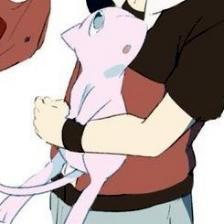

It is a small, pink, cat-like Pokémon. It has large, blue eyes, a small, black nose, and a long, thin tail with a pink tip. Its ears are pointed and its feet are small and dainty.
Can not resolve an image


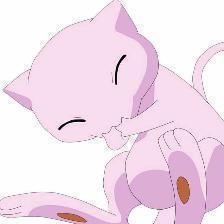

It is a small, pink, cat-like Pokémon. It has large, blue eyes, a small, black nose, and a long, thin tail. Its ears are pointed and its fur is short and smooth. The tip of its tail is a darker pink, and it has a small, pink paw pad on each foot.
Can not resolve an image


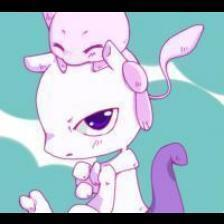

It is a small, pink, cat-like Pokémon with large, blue eyes and a long, wavy tail. It has a tuft of fur on its head and a blue ribbon around its neck.
Can not resolve an image


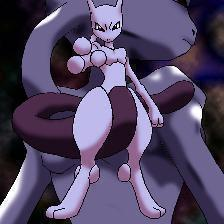

This Pokemon is pink and bipedal, with a long, slender tail and large, pointed ears. It has a feminine appearance, with a small waist and wide hips. Its arms and legs are long and slender, and its feet have three toes each.
Can not resolve an image


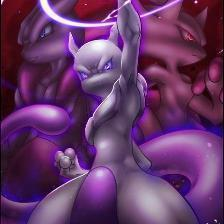

This Pokemon is a bipedal, feline-like creature with mostly purple fur. It has a long, whip-like tail and a pair of pointed ears. Its eyes are yellow with slitted pupils. It has a pair of white claws on each of its hands and feet.
Can not resolve an image


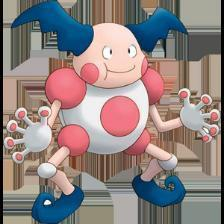

This Pokemon is pink and white. It has a round body with stubby arms and legs. It has a large head with a wide mouth and a pair of black eyes. It also has a pair of antennae on its head.
Can not resolve an image


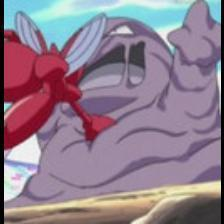

It is a large, purple, blob-like creature. It has a wide mouth and small, beady eyes. Its body is covered in a thick
Can not resolve an image


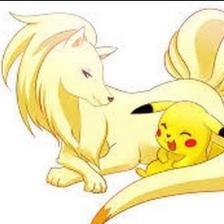

It has cream-colored fur, a red nose, and six orange tails. Each of its tails splits into three parts at the tip, resembling flames.
Can not resolve an image


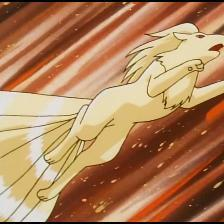

It has six tails and a cream-colored body. The tips of its tails and ears are orange. It has red eyes and a long, flowing mane.
Can not resolve an image


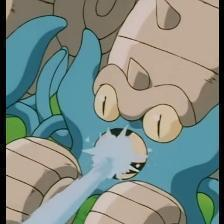

It has a large, spiraled shell that is mostly tan with a blue "door" and a blue "eye". It has two large, blue claws and a small, blue body.
Can not resolve an image


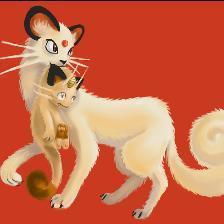

This Pokémon is a quadruped, feline-like mammal with a slender body and long, pointed ears. Its fur is primarily light tan in color, with darker brown stripes on its face, back, and tail. It has a red jewel on its forehead and its eyes are yellow in color.
Can not resolve an image


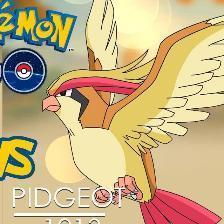

It has brown and yellow feathers. It has a red marking on its head and a red tail. Its beak and feet are pink.
Can not resolve an image


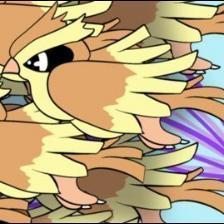

It is a small, plump bird Pokémon with primarily yellow plumage. It has a red, triangular crest on its head, a black patch around its eyes, and a small, orange beak. Its wings and tail feathers are orange, and it has a pair of black, triangular markings on its chest. Its legs are pink, and it has three toes on each foot.
Can not resolve an image


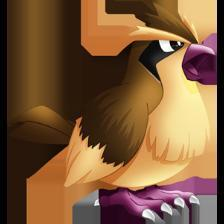

It has a round body with mainly brown and tan plumage. It has a small, black, beady eyes and a short, pointed, yellow beak. Its wings and tail feathers are brown, while its belly feathers are tan. Its legs are pink with two sharp claws on each foot.


Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/4869 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/49 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1390 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/14 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/732 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/8 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/4.34k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/TeeA/Pokemon-Captioning-Classification/commit/c1f10fa6cdcd31b6a1a9e54bdb2348362e1a3e0e', commit_message='Upload dataset', commit_description='', oid='c1f10fa6cdcd31b6a1a9e54bdb2348362e1a3e0e', pr_url=None, pr_revision=None, pr_num=None)

In [19]:
num_img_per_period = 100
ds['train'] = ds['train'].map(add_caption, fn_kwargs={"handcraft": True})
ds.push_to_hub("TeeA/Pokemon-Captioning-Classification")

Parameter 'function'=<function add_caption at 0x7d9a6c989b40> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


Map:   0%|          | 0/1390 [00:00<?, ? examples/s]

Can not resolve an image


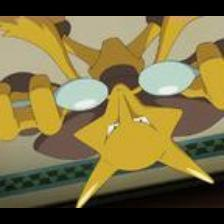

It has a yellow body with a tan belly and a tuft of fur on its head. It has three claws on each foot and a long tail with a tuft of fur on the end. Its eyes are red, and it has a small, triangular nose.
Can not resolve an image


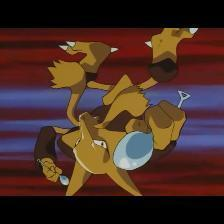

This Pokemon is primarily yellow in color. It has a spherical head with two large, pointed ears. It has a black, mask-like marking around its eyes, and its mouth is usually hidden by a curled yellow appendage. It has a long, thin neck and a torso that is wider at the top than at the bottom. Its arms are long and slender, and its hands have three fingers each. Its legs are short and thick, and its feet have three toes each. It has a long, pointed tail that is tipped with a black orb.
Can not resolve an image


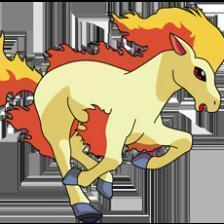

	 It is a quadruped, equine Pokémon with a golden coat and purple hooves. It has a long, flowing mane and tail that are both tipped with fire. There are flames coming out of its nostrils and covering its back.
Can not resolve an image


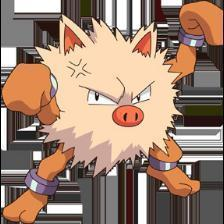

It has a pink, pig-like nose and two black eyes. Its body is covered in shaggy, cream-colored fur, and it has brown, spiked bands around its arms and legs.
Can not resolve an image


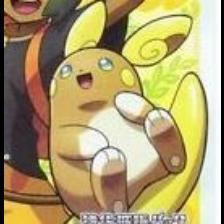

	 It has a cream-colored belly and a brown patch on its back. Its ears are long and pointed, its eyes are black, and its nose is small and black. It has two brown stripes on its head and a brown tail with a white tip.
Can not resolve an image


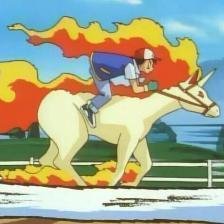

It is a quadruped equine Pokémon with a tan body and red mane. It has a long, flowing tail and a single horn on its forehead. Its legs are yellow and it has a yellow, flame-like marking on its chest.
Can not resolve an image


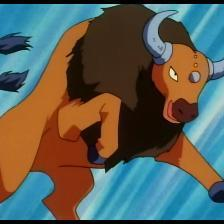

It has a large, bison-like body with tan fur. It has a thick, brown mane around its neck and shoulders. It has a pair of horns on its head and a ring on its nose.
Can not resolve an image


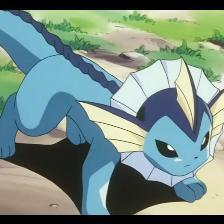

This Pokemon has blue fur with a cream-colored belly and a light blue fin on its back. It has large, light blue ears and a dark blue, V-shaped marking on its forehead. It has a long, serpentine body with a cream-colored underside and a light blue tail with a dark blue fin on the end.
Can not resolve an image


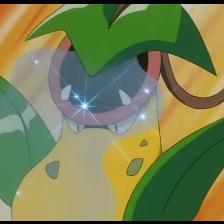

It has a large mouth with sharp teeth and a long tongue. Its body is mostly yellow with green leaves around the mouth and on the top of its head. It has two small arms and two small legs.
Can not resolve an image


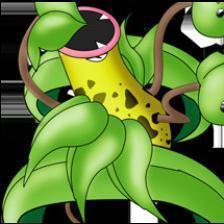

It has a large mouth with sharp teeth. Its body is mostly yellow with green spots. It has two large leaves and a vine-like appendage.
Can not resolve an image


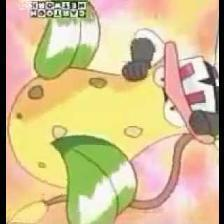

It looks like a yellow banana with green spots. It wears a hat that has a red and white stripe going around it. It has a long green vine-like appendage that it uses to move around.
Can not resolve an image


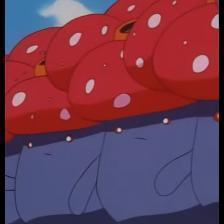

It has a large, red, mushroom-like head with five white spots. The head is supported by a thick, blue stalk. It has four blue, leaf-like arms and two blue, stubby legs.
Can not resolve an image


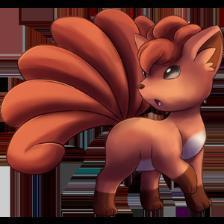

It has cream-colored fur with a tuft of fur on its head that resembles hair. It has a fox-like appearance, with large, triangular ears and a long, bushy tail with a pink tip.
Can not resolve an image


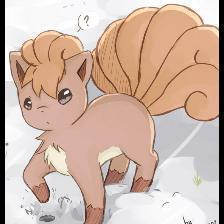

It has a fluffy orange fur and a cream-colored belly. It has large, triangular ears and a tuft of fur on its head. Its eyes are black and its nose is brown. It has a long, bushy tail with a white tip.


Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/4869 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/49 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1390 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/14 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/732 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/8 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/4.34k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/TeeA/Pokemon-Captioning-Classification/commit/4223823ac63875d01eb869c3ea34e43908cbe233', commit_message='Upload dataset', commit_description='', oid='4223823ac63875d01eb869c3ea34e43908cbe233', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
num_img_per_period = 100
ds['validation'] = ds['validation'].map(add_caption, fn_kwargs={"handcraft": True})
ds.push_to_hub("TeeA/Pokemon-Captioning-Classification")

In [ ]:
num_img_per_period = 100
ds['test'] = ds['test'].map(add_caption, fn_kwargs={"handcraft": True})
ds.push_to_hub("TeeA/Pokemon-Captioning-Classification")

# References



1.   Google AI Gemini. https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/python_quickstart.ipynb#scrollTo=MCzr5ZpNhxLm
2.   Pokemon classification dataset. https://huggingface.co/datasets/keremberke/pokemon-classification

